<a href="https://www.kaggle.com/code/ayudewi/malaria-in-africa-2007-2017?scriptVersionId=120458607" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malaria-in-africa/DatasetAfricaMalaria.csv
/kaggle/input/world-shapefile/world_shapefile.dbf
/kaggle/input/world-shapefile/world_shapefile.shx
/kaggle/input/world-shapefile/Readme.txt
/kaggle/input/world-shapefile/world_shapefile.shp


### Install packages

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium as fol
import plotly.express as px


### Add data and check

In [3]:
# Read the file into a variable data frame or df
df = pd.read_csv('../input/malaria-in-africa/DatasetAfricaMalaria.csv')

# Print the first 5 rows of the data
df.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [4]:
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [5]:
# See original data
display(df)

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,...,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


**Note:** 
* Malaria cases reported value (see Benin, 2007) < incidence rates --> this might be wrong ?
* Header name columns are too long --> should be simplify for easy coding
* Indicator of malaria will use Cases and Incidence rates
* Many NaN values --> change to 0

### Rename column header

In [6]:
# create a dictionary
# key = old name
# value = new name
dict = {'Incidence of malaria (per 1,000 population at risk)': 'Incidence rates',
        'Malaria cases reported': 'Cases',
        'Use of insecticide-treated bed nets (% of under-5 population)': '% Use ITNs',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)': '% Child fever',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)': '% IPT',
       'People using safely managed drinking water services (% of population)':'% Safe DW all',
       'People using safely managed drinking water services, rural (% of rural population)': '% Safe DW rural',
       'People using safely managed drinking water services, urban (% of urban population)': '% Safe DW urban',
       'People using safely managed sanitation services (% of population)': '% Safe sanitation all',
       'People using safely managed sanitation services, rural (% of rural population)': '% Safe sanitation rural',
       'People using safely managed sanitation services, urban  (% of urban population)': '% Safe sanitation urban',
       'Rural population (% of total population)': '% Rural pop',
       'Rural population growth (annual %)': '% Rural annual growth',
       'Urban population (% of total population)': '% Urban pop',
       'Urban population growth (annual %)': '% Urban annual growth',
       'People using at least basic drinking water services (% of population)': '% Basic DW all',
       'People using at least basic drinking water services, rural (% of rural population)': '% Basic DW rural',
       'People using at least basic drinking water services, urban (% of urban population)': '% Basic DW urban',
       'People using at least basic sanitation services (% of population)': '% Basic sanitation all',
       'People using at least basic sanitation services, rural (% of rural population)': '% Basic sanitation rural',
       'People using at least basic sanitation services, urban (% of urban population)': '% Basic sanitation urban'
       }
 
# call rename () method
df.rename(columns=dict,
          inplace=True)
 
# print Data frame after rename columns
display(df)

,Country Name,Year,Country Code,Incidence rates,Cases,% Use ITNs,% Child fever,% IPT,% Safe DW all,% Safe DW rural,...,% Urban annual growth,% Basic DW all,% Basic DW rural,% Basic DW urban,% Basic sanitation all,% Basic sanitation rural,"People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,...,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


### Change NaN values to zero

In [7]:
df = df.fillna(0)
display(df)

,Country Name,Year,Country Code,Incidence rates,Cases,% Use ITNs,% Child fever,% IPT,% Safe DW all,% Safe DW rural,...,% Urban annual growth,% Basic DW all,% Basic DW rural,% Basic DW urban,% Basic sanitation all,% Basic sanitation rural,"People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,0.0,0.0,0.0,0.00,0.00,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,0.00,0.00,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,0.0,0.0,0.0,0.00,0.00,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,0.0,0.0,0.0,0.00,0.00,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,0.0,0.0,0.0,0.00,0.00,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,0.00,0.00,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,0.00,0.0,0.0,0.0,0.0,92.66,0.00,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,0.0,0.0,0.0,7.07,4.46,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,0.0,0.0,0.0,0.00,0.00,...,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


### Pivot Malaria cases and incidence rates based on Country Name and Year

## Q1. Describe the malaria cases and incidence rates in Africa!

In [8]:
pd.pivot_table(df, index = ['Country Name', 'Year'], values =['Incidence rates','Cases'])

Cases  Incidence rates
Country Name Year                           
Algeria      2007      26.0             0.01
             2008       3.0             0.00
             2009       0.0             0.00
             2010       1.0             0.00
             2011       1.0             0.00
...                     ...              ...
Zimbabwe     2013  422633.0            81.95
             2014  548276.0           101.89
             2015  482379.0            97.65
             2016  314003.0            65.78
             2017  467508.0           108.55

[594 rows x 2 columns]

### Univariate analysis

In [9]:
#Univariate analysis of malaria cases
print("Malaria cases")
df['Cases'].describe()

Malaria cases


count    5.940000e+02
mean     9.891945e+05
std      2.128383e+06
min      0.000000e+00
25%      3.080000e+02
50%      5.258350e+04
75%      1.041084e+06
max      1.682113e+07
Name: Cases, dtype: float64

[Text(0.5, 1.0, 'Malaria cases in Africa')]

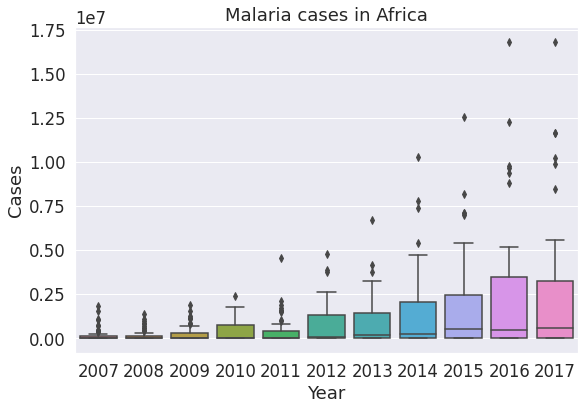

In [10]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(9,6))
sns.boxplot(x='Year', y='Cases', data=df).set(title='Malaria cases in Africa')

### Check data more

In [11]:
# Found error in ValueError: Unable to parse string "DZA" at position 594
# Show and fix
display(df['Country Code']=="DZA", df['Incidence rates'])

0       True
1      False
2      False
3      False
4      False
       ...  
589    False
590    False
591    False
592    False
593    False
Name: Country Code, Length: 594, dtype: bool

0        0.01
1      286.72
2      480.24
3        1.03
4      503.80
        ...  
589    278.20
590      0.00
591    336.76
592    160.05
593    108.55
Name: Incidence rates, Length: 594, dtype: float64

In [12]:
df.dtypes

Country Name                                                                        object
Year                                                                                 int64
Country Code                                                                        object
Incidence rates                                                                    float64
Cases                                                                              float64
% Use ITNs                                                                         float64
% Child fever                                                                      float64
% IPT                                                                              float64
% Safe DW all                                                                      float64
% Safe DW rural                                                                    float64
% Safe DW urban                                                                    float64

[Text(0.5, 1.0, 'Malaria Cases in Africa')]

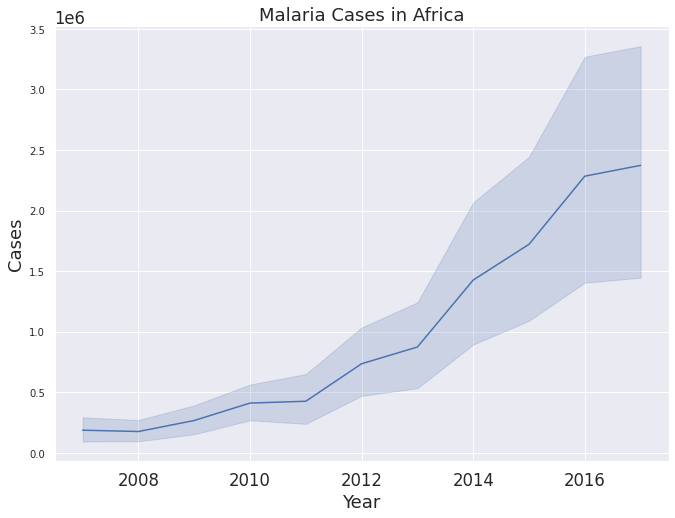

In [13]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(11,8))
plt.yticks(fontsize=10)

sns.lineplot(x='Year', y='Cases', data=df).set(title='Malaria Cases in Africa')

From the line graph above shows that malaria cases in Africa increased over time between 2007-2017. However it also shows that data in 2014-2016 has wider confidence interval which indicate outliers.

**Note that incidence rates only include new cases!**

In [14]:
# Univariate analysis of incidence rates
print("Incidence rates")
df['Incidence rates'].describe()

Incidence rates


count    594.000000
mean     176.006936
std      164.610210
min        0.000000
25%        6.950000
50%      127.355000
75%      337.367500
max      585.540000
Name: Incidence rates, dtype: float64

[Text(0.5, 1.0, 'Malaria Incidence Rates in Africa')]

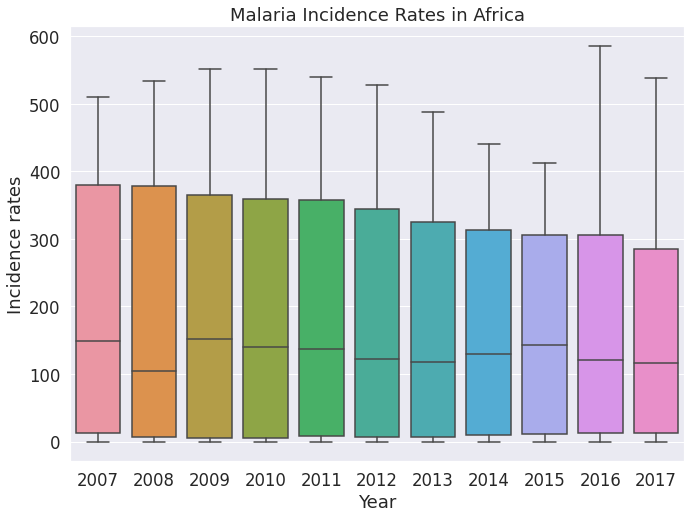

In [15]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(11,8))
sns.boxplot(x='Year', y='Incidence rates', data=df).set(title='Malaria Incidence Rates in Africa')

From the univariate analysis between malaria cases and incidence rates shows that the cases increased but the incidence decreased, means that the cases reported were occured in some same patients or in other words, the cases were not new (repeated cases in same patients).

## Q2. What is the effect of preventive measures on malaria cases in Africa?

[Text(0.5, 1.0, 'Preventive measures for malaria in Africa')]

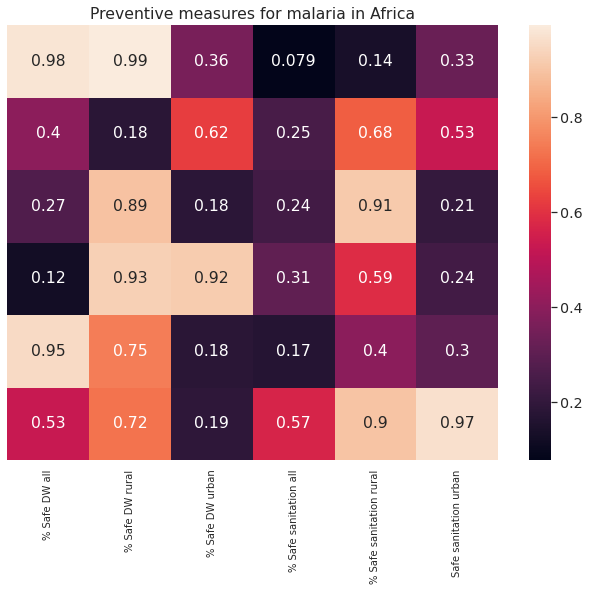

In [16]:
# Create a dataset2
df2 = pd.DataFrame(np.random.random((6,6)), columns=["% Safe DW all","% Safe DW rural","% Safe DW urban", "% Safe sanitation all", "% Safe sanitation rural", "Safe sanitation urban"])

# Create heatmap from dataset2
sns.set(font_scale = 1.3)
plt.figure(figsize=(11,8))
plt.xticks(fontsize=10)
sns.heatmap(df2, annot=True, yticklabels=False).set(title='Preventive measures for malaria in Africa')


From the heatmap above shows that the maximum measurement has been taken in Africa in 2007-2017 includes safe drinking water in urban and safe sanitation in all population.

## Q3. What is the effect of sanitation in urban population in Africa on malaria cases?

[Text(0.5, 1.0, 'Effect of safe sanitation on malaria cases in urban population in Africa')]

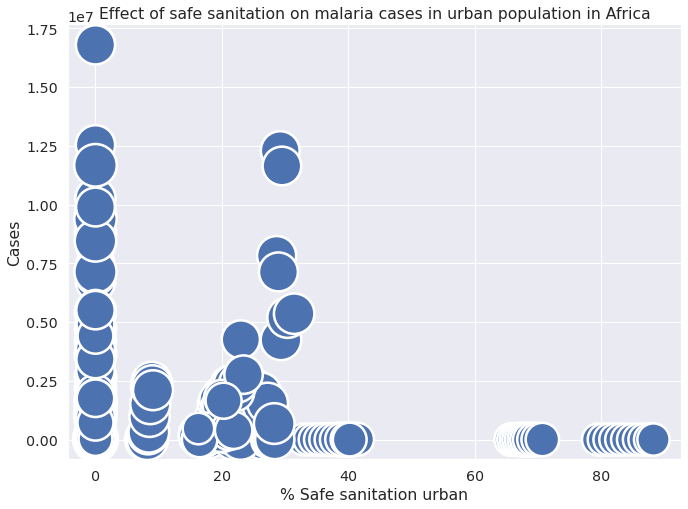

In [17]:
sns.set(font_scale = 1.3)
plt.figure(figsize=(11,8))
sns.scatterplot(data=df, x="% Safe sanitation urban", y="Cases", size="% Urban annual growth", legend=False, sizes=(20, 2000)).set(title='Effect of safe sanitation on malaria cases in urban population in Africa')

For this moment this is end of the analysis. Below is additional analysis but still in progress.

From the scatter plot above shows that the higher percentage of safe sanitation measures taken in urban decreased malaria cases.

## Q4. (additional question) Malaria map?

In [18]:
import folium as fol
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [19]:
# Create folium map
a_map = fol.Map(location=[8.7832, -34.5085], tiles='cartodbpositron', zoom_start=3)
a_map

Also remember that df has format as panel data, so it should be aggregated!

In [20]:
# Aggregate df by Country Code and data values input as average
df_agg=df.groupby('Country Name').mean()
df_agg.head()

,Year,Incidence rates,Cases,% Use ITNs,% Child fever,% IPT,% Safe DW all,% Safe DW rural,% Safe DW urban,% Safe sanitation all,...,% Urban pop,% Urban annual growth,% Basic DW all,% Basic DW rural,% Basic DW urban,% Basic sanitation all,% Basic sanitation rural,"People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
Country Name,,,,,,,,,,,,,,,,,,,,,
Algeria,2012.0,0.003636,8.545455e+00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,17.946364,...,68.830909,2.878182,92.771818,87.520000,95.170000,86.882727,80.051818,90.040909,28.033886,1.659626
Angola,2012.0,207.811818,2.184926e+06,5.963636,6.927273,4.445455,0.0,0.0,0.000000,0.000000,...,61.234545,4.770909,51.942727,25.610909,68.591818,43.582727,18.614545,59.381818,-11.202692,17.873887
Benin,2012.0,410.406364,7.799745e+05,12.945455,5.845455,2.045455,0.0,0.0,0.000000,0.000000,...,44.140909,3.982727,65.212727,56.749091,75.972727,14.397273,6.199091,24.762727,9.307690,2.315834
Botswana,2012.0,1.158182,7.960000e+02,2.809091,0.000000,0.000000,0.0,0.0,83.588182,0.000000,...,64.099091,3.458182,85.076364,66.516364,95.720909,69.869091,45.398182,83.550000,-22.328474,24.684866
Burkina Faso,2012.0,484.809091,3.781997e+06,11.154545,7.663636,2.509091,0.0,0.0,0.000000,0.000000,...,25.808182,5.271818,49.984545,40.131818,78.000909,17.672727,8.955455,43.001818,12.238333,-1.561593


Join attribute by merge df_agg to world

#### Plot the base world map and data

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


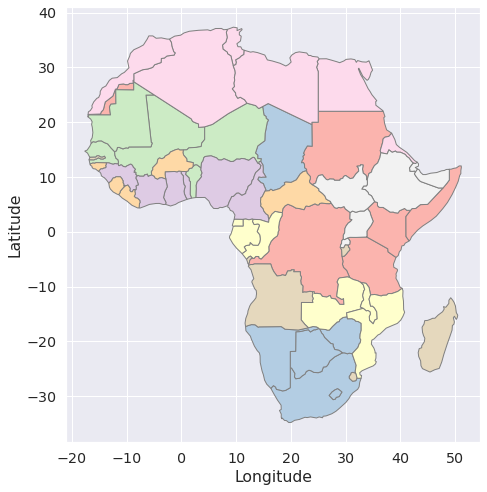

In [21]:
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# or plot Africa continent
ax2 = world[world.continent == 'Africa'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')

# the place to plot additional vector data (points, lines)
# to be continued...................

plt.ylabel('Latitude')
plt.xlabel('Longitude')

#ax2.axis('scaled')
plt.show()

Map still incomplete... will update later.